# Module: preprocessing

This module contains preprocessing functions.  Preprocessing submodules include preprocess (reshape, bin, and crap data), background (fit and subtract background), and electron_count (electron counting).

## Submodule: preprocess

The notebook demos functions related to low level preprocessing functions including
* Reshaping data
* Binning data 
* Cropping data

Note that all functions demoed here are also callable as DataCube class methods. For example
```
set_scan_shape(datacube, 10, 10)
```
is completely equivalent to
```
datacube.set_scan_shape(10, 10)
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import py4DSTEM

from py4DSTEM.process.preprocess import set_scan_shape, swap_RQ, swap_Rxy, swap_Qxy
from py4DSTEM.process.preprocess import crop_data_diffraction, crop_data_real
from py4DSTEM.process.preprocess import bin_data_diffraction, bin_data_real

In [2]:
fp = "/home/ben/Data/20180830_zeltman_smallsampledatasets/2_25x25 ss=25 alpha=p48 spot 11 cl=600 300kV RT bin=4 0p5sec.dm3"
datacube = py4DSTEM.file.readwrite.read(fp)

/home/ben/Data/20180830_zeltman_smallsampledatasets/2_25x25 ss=25 alpha=p48 spot 11 cl=600 300kV RT bin=4 0p5sec.dm3 is not a py4DSTEM file.
/home/ben/Data/20180830_zeltman_smallsampledatasets/2_25x25 ss=25 alpha=p48 spot 11 cl=600 300kV RT bin=4 0p5sec.dm3 is a DM file. Reading with dm.py...


#### Reshape data

In [3]:
# Check current shape

print(datacube.R_Nx, datacube.R_Ny, datacube.Q_Nx, datacube.Q_Ny)
print(datacube.data4D.shape)

625 1 512 512
(625, 1, 512, 512)


In [4]:
# Reshape real space

set_scan_shape(datacube,25,25)

print(datacube.R_Nx, datacube.R_Ny, datacube.Q_Nx, datacube.Q_Ny)
print(datacube.data4D.shape)

25 25 512 512
(25, 25, 512, 512)


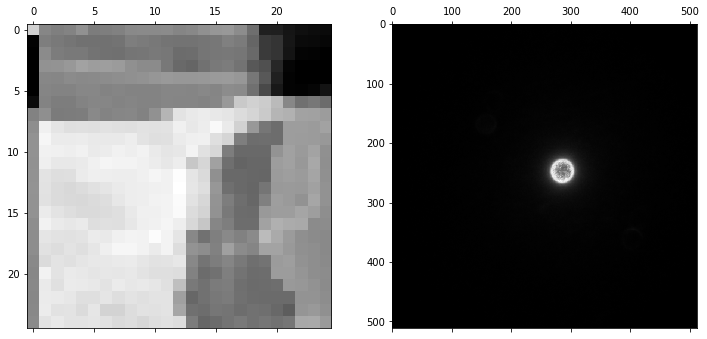

In [5]:
# Show

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
ax2.matshow(datacube.data4D[5,5,:,:])
ax1.matshow(np.average(datacube.data4D,axis=(2,3)))
plt.show()

(512, 512, 25, 25)


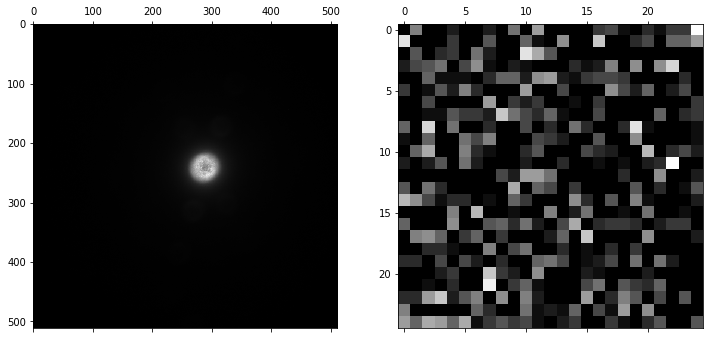

In [6]:
# Swap real and reciprocal space

swap_RQ(datacube)

print(datacube.data4D.shape)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
ax2.matshow(datacube.data4D[5,5,:,:])
ax1.matshow(np.average(datacube.data4D,axis=(2,3)))
plt.show()

(25, 25, 512, 512)


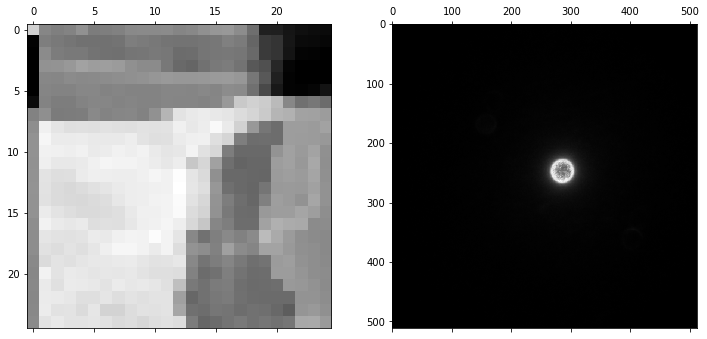

In [7]:
# Swap R/Q back

swap_RQ(datacube)

print(datacube.data4D.shape)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
ax2.matshow(datacube.data4D[5,5,:,:])
ax1.matshow(np.average(datacube.data4D,axis=(2,3)))
plt.show()

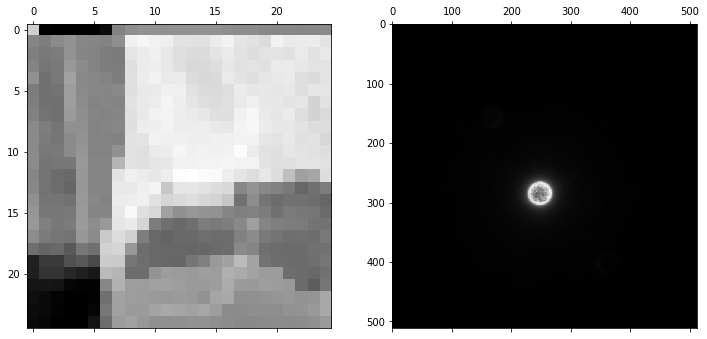

In [8]:
# Swap x/y in either real or diffraction space

swap_Rxy(datacube)
swap_Qxy(datacube)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
ax2.matshow(datacube.data4D[5,5,:,:])
ax1.matshow(np.average(datacube.data4D,axis=(2,3)))
plt.show()

#### Crop and bin

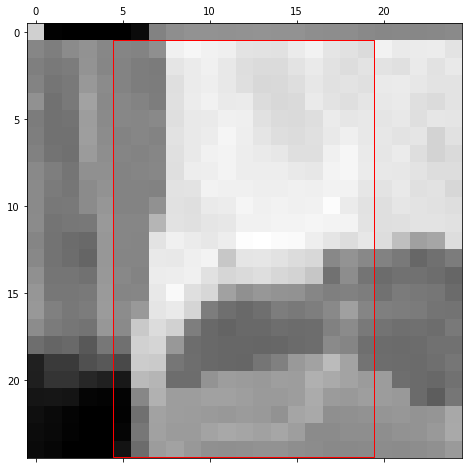

In [9]:
# Crop real space - select ROI

xmin,xmax=1,25
ymin,ymax=5,20

# Display
ave_im = np.average(datacube.data4D,axis=(2,3))
roi_rect = Rectangle(xy=(ymin-0.55,xmin-0.55),width=ymax-ymin,height=xmax-xmin,fill=False,color='r')

fig,ax=plt.subplots(figsize=(8,8))
ax.matshow(ave_im,cmap='gray')
ax.add_patch(roi_rect)
plt.show()

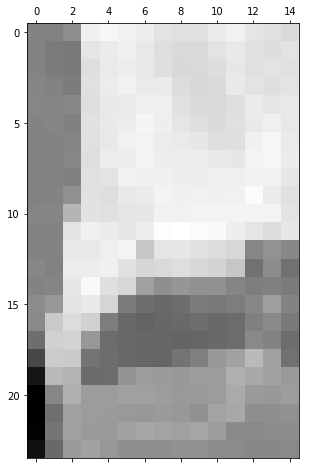

In [10]:
# Crop real space

crop_data_real(datacube,xmin,xmax,ymin,ymax)

fig,ax=plt.subplots(figsize=(8,8))
ax.matshow(np.average(datacube.data4D,axis=(2,3)),cmap='gray')
plt.show()

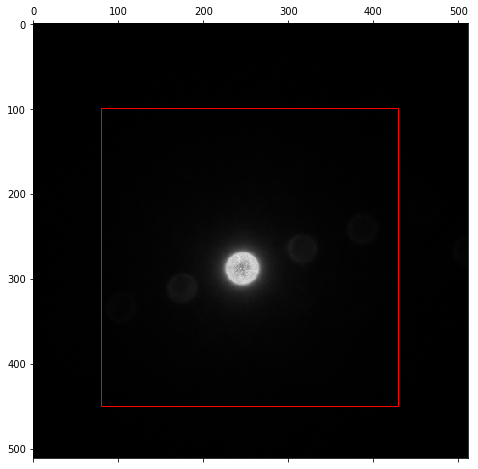

In [11]:
# Crop diffraction space - select ROI

xmin,xmax=100,450
ymin,ymax=80,430

roi_rect = Rectangle(xy=(ymin-0.55,xmin-0.55),width=ymax-ymin,height=xmax-xmin,fill=False,color='r')

# Display
fig,ax=plt.subplots(figsize=(8,8))
ax.matshow(datacube.data4D[5,5,:,:],cmap='gray')
ax.add_patch(roi_rect)
plt.show()

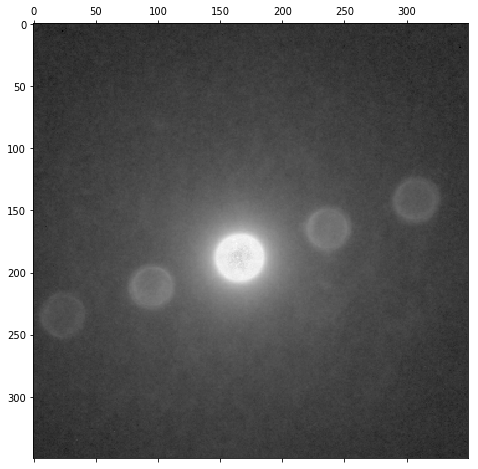

In [12]:
# Crop diffraction space

crop_data_diffraction(datacube,xmin,xmax,ymin,ymax)

# Display
fig,ax=plt.subplots(figsize=(8,8))
ax.matshow(datacube.data4D[5,5,:,:]**0.3,cmap='gray')
plt.show()

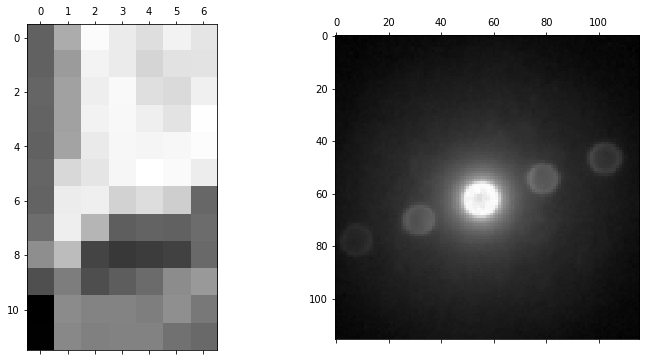

In [14]:
# Bin data

bin_data_real(datacube, bin_factor=2)
bin_data_diffraction(datacube, bin_factor=3)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
ax2.matshow(datacube.data4D[2,2,:,:]**0.3)
ax1.matshow(np.average(datacube.data4D,axis=(2,3)))
plt.show()